# Import liberaries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.__version__

'2.2.3'

## Read Csv file

In [6]:
df1= pd.read_csv('/kaggle/input/titanic/train.csv')
df=df1

## getting the info of the dataset

In [7]:
df.sample(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C


cabin
name
ticket
sex need encoding
embarced need encode


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


delete cabin because it is null 


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

delete cabin

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Count unique values per column

In [11]:
df.nunique()

# passengeid useless

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# data cleaning

## Drop useless cols

[pass id -- name -- ticket -- cabin]

In [13]:
df=df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

## drop duplicates

In [14]:
df.duplicated().sum()

111

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.sample(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
110,0,1,male,47.0,0,0,52.0,S


fill age - - embarked 
misses


## Fill missing Ages with Values

In [18]:
# Calculate actual values (notice the parentheses!)
mean_value = df['Age'].mean()
median_value = df['Age'].median()
mode_value = df['Age'].mode()[0]   # mode() returns a Series, so take first value


In [19]:
# Define bins using qcut
df['Age_bin'] = pd.qcut(df.index, 3, labels=["Q1","Q2","Q3"])

# Fill missing Age values based on quartile
df.loc[(df['Age'].isna()) & (df['Age_bin']=="Q1"), 'Age'] = mean_value
df.loc[(df['Age'].isna()) & (df['Age_bin']=="Q2"), 'Age'] = median_value
df.loc[(df['Age'].isna()) & (df['Age_bin']=="Q3"), 'Age'] = mode_value

# Drop helper column
df = df.drop('Age_bin', axis=1)


## Fill missing Embarked with most common value

In [20]:
df['Embarked'].fillna(df['Embarked'].mode())


0      S
1      C
2      S
3      S
4      S
      ..
885    Q
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 780, dtype: object

## Encode the sex

In [21]:
df['Sex']=df['Sex'].replace({'male':1,'female':0})

/tmp/ipykernel_36/3394265979.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace({'male':1,'female':0})


## check if there is duplicated files

In [22]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
887    False
888    False
889    False
890    False
Length: 780, dtype: bool

### Output

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


# Data visualization

## Style of the seaborn

In [24]:
sns.set_style("whitegrid")

## Survival Count

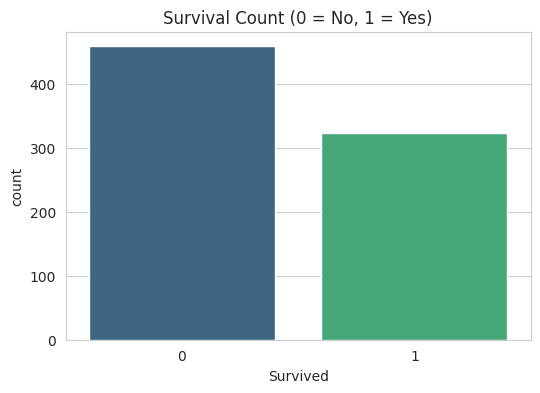

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="viridis")
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

## Survival by Gender

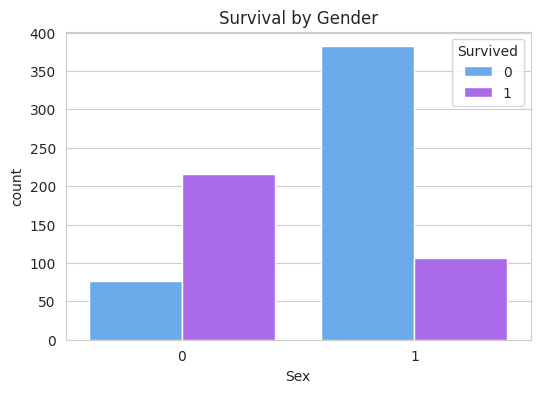

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="cool")
plt.title("Survival by Gender")
plt.show()


## Age distribution 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


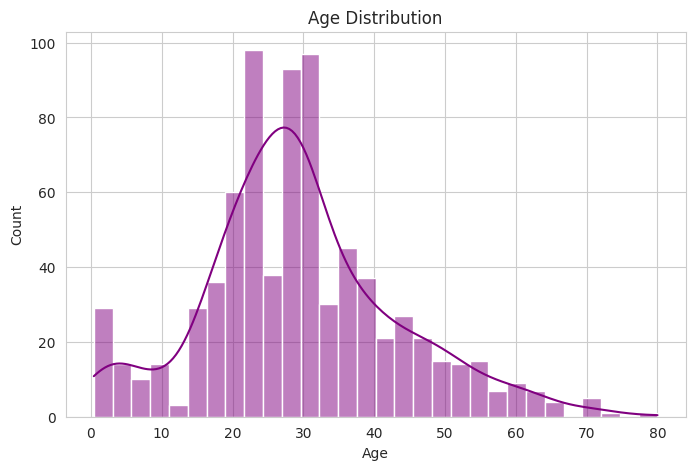

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True, color="purple")
plt.title("Age Distribution")
plt.show()


### Age vs Survival using Boxplot

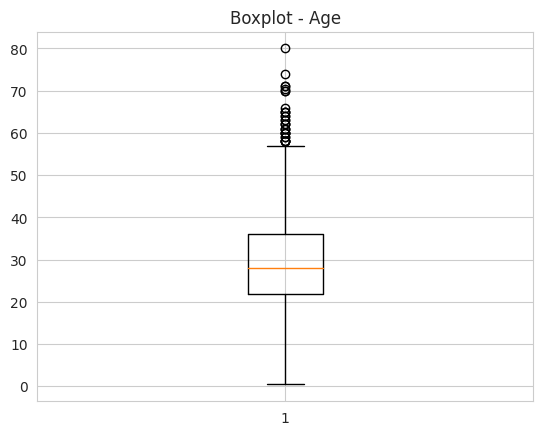

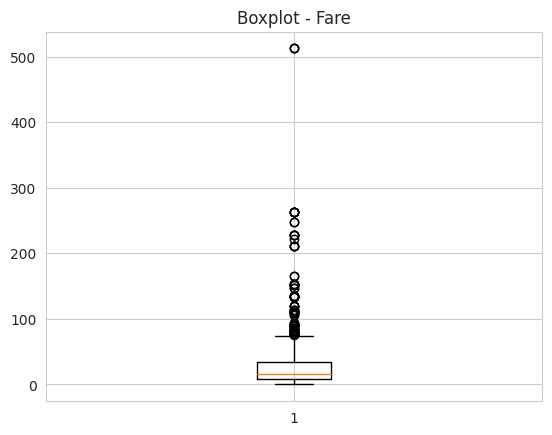

In [28]:
plt.boxplot(df['Age'].dropna())
plt.title("Boxplot - Age")
plt.show()

# Boxplot for Fare
plt.boxplot(df['Fare'].dropna())
plt.title("Boxplot - Fare")
plt.show()

# Standarrization

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
f = StandardScaler()

In [31]:
df['Age_1'] = f.fit_transform(df[['Age']])

In [32]:
df['Fare_1'] = f.fit_transform(df[['Fare']])

In [33]:
df = df.drop(['Age', 'Fare'], axis=1)

In [34]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_1,Fare_1
0,0,3,1,1,0,S,-0.545798,-0.528033
1,1,1,0,1,0,C,0.617790,0.697956
2,1,3,0,0,0,S,-0.254901,-0.515109
3,1,1,0,1,0,S,0.399617,0.349817
4,0,3,1,0,0,S,0.399617,-0.512716


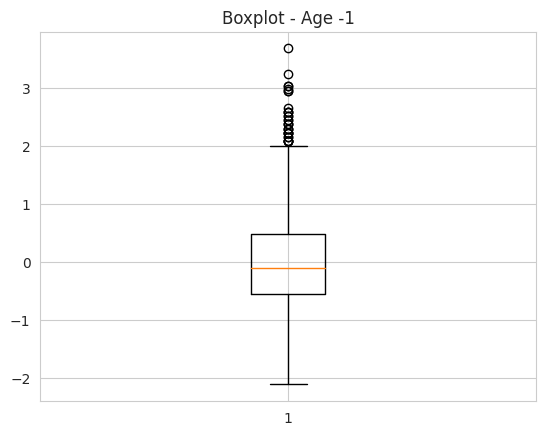

In [35]:
plt.boxplot(df['Age_1'].dropna())
plt.title("Boxplot - Age -1")
plt.show()

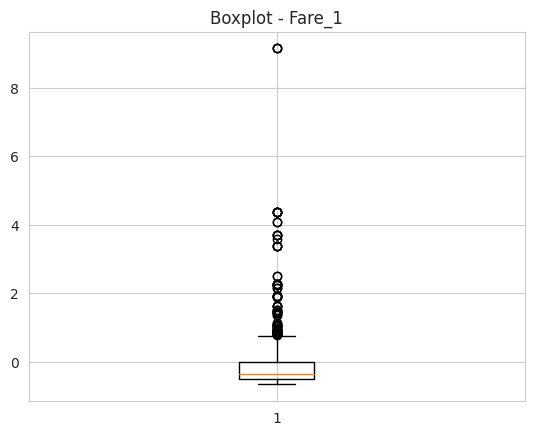

In [36]:
plt.boxplot(df['Fare_1'].dropna())
plt.title("Boxplot - Fare_1")
plt.show()

# Spliting The Data

In [37]:
first = df.drop(columns=['Survived'])   
second = df['Survived']                  

In [38]:
first

,Pclass,Sex,SibSp,Parch,Embarked,Age_1,Fare_1
0,3,1,1,0,S,-0.545798,-0.528033
1,1,0,1,0,C,0.617790,0.697956
2,3,0,0,0,S,-0.254901,-0.515109
3,1,0,1,0,S,0.399617,0.349817
4,3,1,0,0,S,0.399617,-0.512716
...,...,...,...,...,...,...,...
885,3,0,0,5,Q,0.690514,-0.109211
887,1,0,0,0,S,-0.763971,-0.092459
888,3,0,1,2,S,-0.400350,-0.217866
889,1,1,0,0,C,-0.254901,-0.092459


## Import necessary libraries

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Prepare data for modeling

In [40]:
X = pd.get_dummies(df.drop('Survived', axis=1), columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Train Logistic Regression model

In [41]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## Make predictions

In [42]:
y_pred = model.predict(X_test)

## Evaluate model performance

In [43]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Evaluation Metrics:
Accuracy: 0.8077
Precision: 0.7656
Recall: 0.7656
F1 Score: 0.7656


## Confusion Matrix

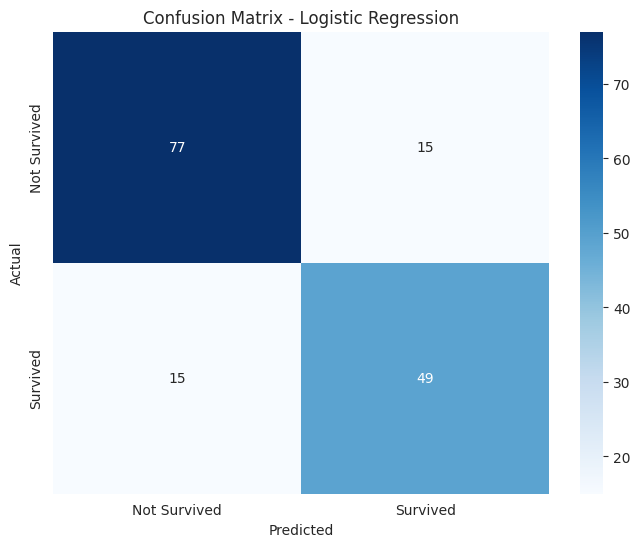

In [44]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Feature Importance (coefficients)

In [45]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

print("\nFeature Importance (Coefficients):")
print(feature_importance)



Feature Importance (Coefficients):
      Feature  Coefficient
3      Fare_1     0.127976
1       Parch    -0.010446
0       SibSp    -0.266271
7  Embarked_Q    -0.313810
8  Embarked_S    -0.347690
4    Pclass_2    -0.507305
2       Age_1    -0.531987
5    Pclass_3    -1.715460
6       Sex_1    -2.235662


## Predict survival probability for test set

In [46]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of survival

# Display first few predictions with probabilities

In [47]:
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Survival_Probability': y_pred_proba
})
print("\nFirst 10 predictions:")
print(results_df.head(10))


First 10 predictions:
   Actual  Predicted  Survival_Probability
0       0          0              0.407601
1       1          1              0.584740
2       0          0              0.099870
3       0          0              0.065338
4       0          0              0.278571
5       0          1              0.522408
6       1          1              0.784768
7       0          0              0.140126
8       0          0              0.140741
9       0          1              0.604248
